# Inngangur að vélarlærdómi

## Einföld línuleg aðhvarfsgreining

Notum gögn sem fengust við endurmat fasteignamats íbúðarhúsnæðis 2017 til að reyna að spá fyrir um verði íbúða út frá gögnum sem við vitum um þær.

In [1]:
# classics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Pakkar frá sklearn
from sklearn.model_selection import train_test_split

# Lesum Gögnin (Þau líta vel ú!)
HousingData = pd.read_csv('HousingData.csv')
HousingData.head()

,verð,stærð,fjherb,fjklós,lyfta,fjhæð,fjbílast,fjbkar,fjsturt
0,18636000,117.0,3,1,0,1,0,1,0
1,17533000,67.9,1,1,0,1,0,0,1
2,14472000,45.7,1,1,0,1,0,0,1
3,14850000,78.1,2,1,0,1,0,1,0
4,20831000,87.4,2,1,0,1,0,1,0


In [111]:
# Skilgreinum spábreytuna og parametrana sem við ætlum að nota (bara stærðina)
y = HousingData['verð']
X = HousingData[['stærð']]

# Skiptum gögnunum í train og test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

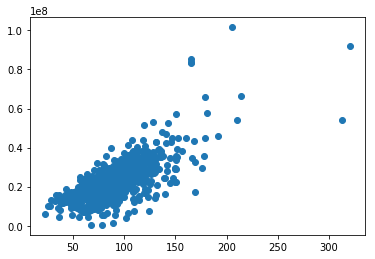

In [112]:
# Erum að reyna að spá fyrir þessum verðum (test gagnasettinu)
plt.scatter(X_test,y_test)
plt.show()

Módelum eftir þjálfunargagnasettinu okkar

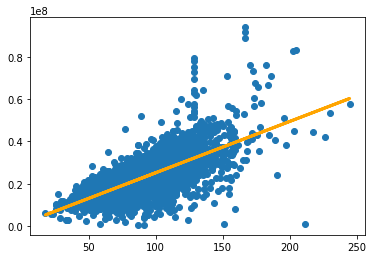

In [113]:
from sklearn import linear_model

# Búum til regression hlut sem er modelið okkar
model = linear_model.LinearRegression()

# Þjálfum modelið okkar
model.fit(X_train, y_train)

# Spáum fyrir þjálfunargögnunum
y_train_pred = model.predict(X_train)

# Teiknum gögnin og módelið okkar 
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, color='orange', linewidth=3)
plt.show()

En hvernig stöndum við okkur á test gagnasettinu okkar?

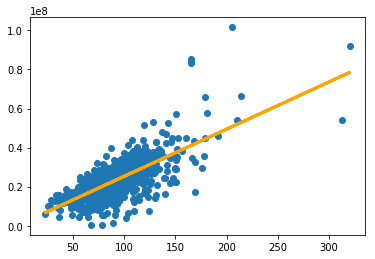

In [114]:
# Spáum fyrir test gögnunum
y_test_pred = model.predict(X_test)

# Teiknum gögnin og spánna 
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, color='orange', linewidth=3)
plt.show()

In [121]:
# Skurðpunktur
print('Intercept: ', model.intercept_)

# Stuðlar við jöfnu bestu línu
print('Coefficients: ', model.coef_)

# Mean squared error
print('Meðalskekkja:', round(np.mean(abs(y_test-y_test_pred))/1000000,1), 'miljónir isk.')

Intercept:  1049001.017984867
Coefficients:  [241941.00684556]
Meðalskekkja: 4.5 miljónir isk.


Alls ekki slæm skekkja! 

Út frá bara stærðinni virðumst við getað áætlað nokkuð vel hvað verð íbúðar í Reykjavík kostar.

Það segir sig samt sjálft að því meira sem við vitum, því auðveldara er að áætla verð íbúðanna. Hvað gerist ef við notum alla parametrana í gagnasafninu til að spá fyrir um verð íbúðana?

In [126]:
# Skilgreinum spábreytuna og parametrana sem við ætlum að nota (bara stærðina)
y = HousingData['verð']
X = HousingData[['stærð','fjherb','fjklós','lyfta','fjhæð','fjbílast','fjbkar','fjsturt']]

# Skiptum gögnunum í train og test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Þjálfum modelið okkar
model.fit(X_train, y_train)

# Spáum fyrir test gögnunum
y_test_pred = model.predict(X_test)

# Skurðpunktur
print('Intercept: ', model.intercept_)

# Stuðlar við jöfnu bestu línu
print('Coefficients: ', model.coef_)

# Mean squared error
print('Meðalskekkja:', round(np.mean(abs(y_test-y_test_pred))/1000000,1), 'miljónir isk.')

Intercept:  -1233334.178574469
Coefficients:  [  222406.03639874  -950934.96260701  4874107.83628969  1053459.66605436
 -1718547.44464073  3647375.65759009   898784.97928374  2069007.35080493]
Meðalskekkja: 4.1 miljónir isk.


Já sæll! Ættum við ekki bara að gerast fasteignasalar?